<a id = 'top'></a>

# INDEX
* [DF  -  Analysing Accidents per Lakh Population-State-Year.](#df)
* [DF1 -  Analysing Offender and Victim Deaths per Gender, State.](#df1)
* [DF2 -  Analysing Deaths occured due to improper use of Safety Accessories.](#df2)
* [DF4 -  Analysing accidents/injuries/deaths occuring as per number of lanes.](#df4)

df  = roadAccStats13-16.csv

df1 = Details_of_road_accident_deaths_by_situation_state_2014.csv

df2 = Persons_killed_due_to_Non-use_of_Safety_Device_2016.csv

df3 = datafile.xls

df4 = laneAccidents.csv

df5 =

df6 =



In [109]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn
import csv
import os
import xlrd
from collections import defaultdict
import math as m
from jupyterthemes import jtplot

In [2]:
df = pd.read_csv('A:\Data Analysis Jupyter\Road-Accidents-Of-India\Databases\\roadAccStats13-16.csv')

In [3]:
df1 = pd.read_csv('A:\Data Analysis Jupyter\Road-Accidents-Of-India\Databases\\Details_of_road_accident_deaths_by_situation_state_2014.csv')

In [4]:
df2 = pd.read_csv('A:\Data Analysis Jupyter\Road-Accidents-Of-India\Databases\\Persons_killed_due_to_Non-use_of_Safety_Device_2016.csv')

In [5]:
df3 = pd.read_excel('A:\Data Analysis Jupyter\Road-Accidents-Of-India\Databases\\datafile.xls')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [6]:
plt.rcParams['figure.figsize'] = [10, 5]

In [7]:
jtplot.style()
jtplot.style(theme = 'onedork')
jtplot.style(context = 'talk', fscale = 1.4, spines = False, gridlines = '--')
jtplot.style(ticks = True, grid = False, figsize=(6, 4.5))
jtplot.reset()

df dataset tells about the **road accidents counts in each stage for years 2013 to 2016.**


In [8]:
df.head()

,SI. No.,States/UTs,State/UT-Wise Total Number of Road Accidents during - 2013,State/UT-Wise Total Number of Road Accidents during - 2014,State/UT-Wise Total Number of Road Accidents during - 2015,State/UT-Wise Total Number of Road Accidents during - 2016,Share of States/UTs in Total Number of Road Accidents - 2013,Share of States/UTs in Total Number of Road Accidents - 2014,Share of States/UTs in Total Number of Road Accidents - 2015,Share of States/UTs in Total Number of Road Accidents - 2016,Total Number of Accidents Per Lakh Population - 2013,Total Number of Accidents Per Lakh Population - 2014,Total Number of Accidents Per Lakh Population - 2015,Total Number of Accidents Per Lakh Population - 2016,"Total Number of Road Accidents per 10,000 Vehicles - 2013","Total Number of Road Accidents per 10,000 Vehicles - 2014","Total Number of Road Accidents per 10,000 Vehicles - 2015","Total Number of Road Accidents per 10,000 Km of Roads - 2013","Total Number of Road Accidents per 10,000 Km of Roads - 2014","Total Number of Road Accidents per 10,000 Km of Roads - 2015"
0,1,Andhra Pradesh,43482.0,24440,24258,24888,8.9,5.0,4.8,5.2,50.4,28.1,27.7,28.2,34.3,34.9,30.8,1661.8,1372.3,1355.0
1,2,Arunachal Pradesh,308.0,205,284,249,0.1,0.0,0.1,0.1,24.3,16.0,21.9,19.0,20.4,13.6,18.8,109.6,83.8,112.0
2,3,Assam,7211.0,7144,6959,7435,1.5,1.5,1.4,1.5,23.0,22.5,21.7,22.9,38.4,32.2,27.7,250.3,227.8,213.1
3,4,Bihar,10200.0,9556,9555,8222,2.1,2.0,1.9,1.7,10.2,9.4,9.3,7.9,28.2,23.0,20.0,517.1,455.6,463.8
4,5,Chhattisgarh,13657.0,13821,14446,13580,2.8,2.8,2.9,2.8,54.8,54.8,56.5,52.5,39.7,35.7,33.5,1530.4,1461.3,1481.1


In [9]:
df.shape

(37, 20)

In [10]:
df.dtypes

SI. No.                                                          object
States/UTs                                                       object
State/UT-Wise Total Number of Road Accidents during - 2013      float64
State/UT-Wise Total Number of Road Accidents during - 2014        int64
State/UT-Wise Total Number of Road Accidents during - 2015        int64
State/UT-Wise Total Number of Road Accidents during - 2016        int64
Share of States/UTs in Total Number of Road Accidents - 2013    float64
Share of States/UTs in Total Number of Road Accidents - 2014    float64
Share of States/UTs in Total Number of Road Accidents - 2015    float64
Share of States/UTs in Total Number of Road Accidents - 2016    float64
Total Number of Accidents Per Lakh Population - 2013            float64
Total Number of Accidents Per Lakh Population - 2014            float64
Total Number of Accidents Per Lakh Population - 2015            float64
Total Number of Accidents Per Lakh Population - 2016            

In [11]:
type(df['SI. No.'][0])

str

In [12]:
type(df['States/UTs'][0])

str

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 20 columns):
SI. No.                                                         37 non-null object
States/UTs                                                      37 non-null object
State/UT-Wise Total Number of Road Accidents during - 2013      36 non-null float64
State/UT-Wise Total Number of Road Accidents during - 2014      37 non-null int64
State/UT-Wise Total Number of Road Accidents during - 2015      37 non-null int64
State/UT-Wise Total Number of Road Accidents during - 2016      37 non-null int64
Share of States/UTs in Total Number of Road Accidents - 2013    37 non-null float64
Share of States/UTs in Total Number of Road Accidents - 2014    37 non-null float64
Share of States/UTs in Total Number of Road Accidents - 2015    37 non-null float64
Share of States/UTs in Total Number of Road Accidents - 2016    37 non-null float64
Total Number of Accidents Per Lakh Population - 2013            3

### Calculating the Usefulness of colums.

In [14]:
row, column = df.shape

In [15]:
# CALCULATE Usefullness of columns
round(((row - df.isnull().sum())/ row) * 100,2)

SI. No.                                                         100.0
States/UTs                                                      100.0
State/UT-Wise Total Number of Road Accidents during - 2013       97.3
State/UT-Wise Total Number of Road Accidents during - 2014      100.0
State/UT-Wise Total Number of Road Accidents during - 2015      100.0
State/UT-Wise Total Number of Road Accidents during - 2016      100.0
Share of States/UTs in Total Number of Road Accidents - 2013    100.0
Share of States/UTs in Total Number of Road Accidents - 2014    100.0
Share of States/UTs in Total Number of Road Accidents - 2015    100.0
Share of States/UTs in Total Number of Road Accidents - 2016    100.0
Total Number of Accidents Per Lakh Population - 2013             97.3
Total Number of Accidents Per Lakh Population - 2014             97.3
Total Number of Accidents Per Lakh Population - 2015             97.3
Total Number of Accidents Per Lakh Population - 2016             97.3
Total Number of Road

In [16]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
dtype: bool

Check for repeatition of values.

In [17]:
df['States/UTs'].value_counts()

Karnataka                    1
Madhya Pradesh               1
Chandigarh                   1
Andhra Pradesh               1
Assam                        1
Gujarat                      1
West Bengal                  1
Maharashtra                  1
Total                        1
Uttar Pradesh                1
Kerala                       1
Haryana                      1
Goa                          1
Chhattisgarh                 1
Arunachal Pradesh            1
Meghalaya                    1
Telangana                    1
Uttarakhand                  1
Punjab                       1
Tamil Nadu                   1
Sikkim                       1
Mizoram                      1
Andaman & Nicobar Islands    1
Lakshadweep                  1
Manipur                      1
Jammu & Kashmir              1
Bihar                        1
Odisha                       1
Jharkhand                    1
Himachal Pradesh             1
Nagaland                     1
Rajasthan                    1
Puducher

**No repeatition present.**


#------------------------------------------------------------------------------------------------------#

*df1* dataset shows **vehicle types involved in accidents around the country.**


In [18]:
df1.head()

,States/UTs,Year,CrimeHead,Offenders (Driver/Pedestrian) Died_Male,Offenders (Driver/Pedestrian) Died_Female,Offenders (Driver/Pedestrian) Died_Transgender,Offenders (Driver/Pedestrian) Died_Total,Victims Died_Male,Victims Died_Female,Victims Died_Transgender,Victims Died_Total
0,Andhra Pradesh,2014,Truck/Lorry (Total),445,30,0,475,871,135,0,1006
1,Andhra Pradesh,2014,Truck/Lorry - Normal Goods Carriers,357,25,0,382,577,101,0,678
2,Andhra Pradesh,2014,Truck/Lorry - Trailer/Container Carriers,12,0,0,12,25,0,0,25
3,Andhra Pradesh,2014,Truck/Lorry - Tankers,10,0,0,10,102,15,0,117
4,Andhra Pradesh,2014,Truck/Lorry - Others,66,5,0,71,167,19,0,186


In [19]:
df1['CrimeHead'].unique()
df1['CrimeHead'].nunique()

37

In [20]:
df1.shape

(1443, 11)

In [21]:
df1.dtypes

States/UTs                                        object
Year                                               int64
CrimeHead                                         object
Offenders (Driver/Pedestrian) Died_Male            int64
Offenders (Driver/Pedestrian) Died_Female          int64
Offenders (Driver/Pedestrian) Died_Transgender     int64
Offenders (Driver/Pedestrian) Died_Total           int64
Victims Died_Male                                  int64
Victims Died_Female                                int64
Victims Died_Transgender                           int64
Victims Died_Total                                 int64
dtype: object

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 11 columns):
States/UTs                                        1443 non-null object
Year                                              1443 non-null int64
CrimeHead                                         1443 non-null object
Offenders (Driver/Pedestrian) Died_Male           1443 non-null int64
Offenders (Driver/Pedestrian) Died_Female         1443 non-null int64
Offenders (Driver/Pedestrian) Died_Transgender    1443 non-null int64
Offenders (Driver/Pedestrian) Died_Total          1443 non-null int64
Victims Died_Male                                 1443 non-null int64
Victims Died_Female                               1443 non-null int64
Victims Died_Transgender                          1443 non-null int64
Victims Died_Total                                1443 non-null int64
dtypes: int64(9), object(2)
memory usage: 124.1+ KB


In [23]:
df1.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1413    False
1414    False
1415    False
1416    False
1417    False
1418    False
1419    False
1420    False
1421    False
1422    False
1423    False
1424    False
1425    False
1426    False
1427    False
1428    False
1429    False
1430    False
1431    False
1432    False
1433    False
1434    False
1435    False
1436    False
1437    False
1438    False
1439    False
1440    False
1441    False
1442    False
Length: 1443, dtype: bool

#--------------------------------------------------------------------#

In [24]:
df3.head()

,States/Uts,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Andhra Pradesh,8616.0,9343.0,9126.0,11378.0,11885.0,12233.0,12676.0,13932.0,13783.0,13560.0,13175.0,7277,7524,7851
1,Arunachal Pradesh,65.0,79.0,63.0,87.0,81.0,90.0,114.0,108.0,96.0,94.0,120.0,92,117,103
2,Assam,1120.0,1177.0,1420.0,1627.0,1483.0,1641.0,1735.0,1924.0,2015.0,2011.0,2162.0,2169,2122,2445
3,Bihar,2138.0,1579.0,1462.0,2315.0,3074.0,3514.0,4038.0,4513.0,4676.0,4706.0,4612.0,4505,4771,4425
4,Chhattisgarh,1788.0,1892.0,2049.0,2288.0,2496.0,2600.0,2566.0,2668.0,2659.0,2783.0,3059.0,3570,3710,3527


In [25]:
round(((row - df3.isnull().sum())/row) * 100, 2)

States/Uts    100.00
2003           97.30
2004           97.30
2005           97.30
2006           97.30
2007           97.30
2008           97.30
2009           97.30
2010           97.30
2011           97.30
2012           94.59
2013           97.30
2014          100.00
2015          100.00
2016          100.00
dtype: float64

*** 
<a id='df'></a>
[Go to top](#top)
# DF - 
This dataset is about **Number of accidents** per state, accidents sharing multiple states and TOTAL number of accidents overall 
per year per state.
### Calculating the mean of State wise Total number of Road Accidents.

In [26]:
mean13 = np.mean(df['State/UT-Wise Total Number of Road Accidents during - 2013'])
print("Mean of accidents happened in all states in year 2013: {}".format(mean13))

Mean of accidents happened in all states in year 2013: 27026.444444444445


In [27]:
mean14 = np.mean(df['State/UT-Wise Total Number of Road Accidents during - 2014'])
print("Mean of accidents happened in all states in year 2014 : {}".format(mean14))

Mean of accidents happened in all states in year 2014 : 26454.054054054053


In [28]:
mean15 = np.mean(df['State/UT-Wise Total Number of Road Accidents during - 2015'])
print("Mean of accidents happened in all states in year 2015 : {}".format(mean15))

Mean of accidents happened in all states in year 2015 : 27103.945945945947


In [29]:
mean16 = np.mean(df['State/UT-Wise Total Number of Road Accidents during - 2016'])
print("Mean of accidents happened in all states in 2016 {}".format(mean16))

Mean of accidents happened in all states in 2016 25981.18918918919


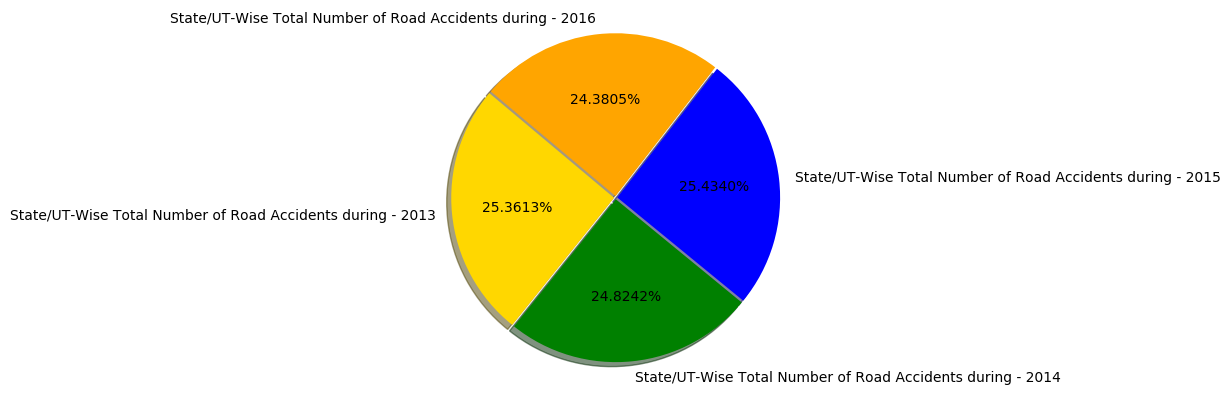

In [30]:
labels = 'State/UT-Wise Total Number of Road Accidents during - 2013', 'State/UT-Wise Total Number of Road Accidents during - 2014', 'State/UT-Wise Total Number of Road Accidents during - 2015', 'State/UT-Wise Total Number of Road Accidents during - 2016'
sizes = [mean13, mean14, mean15, mean16]
colors = ['gold', 'green', 'blue', 'orange']
explode = (0.01, 0.01, 0.01, 0.01)
plt.pie(sizes, labels = labels, colors = colors, explode = explode,
       shadow = True, autopct = '%.4f%%', startangle = 140)
plt.axis('equal')
plt.show()

It is clearly visible that, the percentage of road accidents are **almost constant during all years.**
It indicates that the government is making less efforts to prevent accidents by creating wider, good quality roads or creating new safety rules.

### Calculating mean of total number of accidents per lakh population over the years.

In [31]:
acc13 = np.mean(df['Total Number of Accidents Per Lakh Population - 2013'])
print("Mean of accidents per lakh population in 2013 : {}".format(acc13))

Mean of accidents per lakh population in 2013 : 41.91111111111111


In [32]:
acc14 = np.mean(df['Total Number of Accidents Per Lakh Population - 2014'])
print("Mean of accidents per lakh population in 2014 : {}".format(acc14))

Mean of accidents per lakh population in 2014 : 39.87777777777778


In [33]:
acc15 = np.mean(df['Total Number of Accidents Per Lakh Population - 2015'])
print("Mean of accidents per lakh population in 2015 : {}".format(acc15))

Mean of accidents per lakh population in 2015 : 40.83333333333333


In [34]:
acc16 = np.mean(df['Total Number of Accidents Per Lakh Population - 2016'])
print("Mean of accidents per lakh population in 2016 : {}".format(acc16))

Mean of accidents per lakh population in 2016 : 39.636111111111106


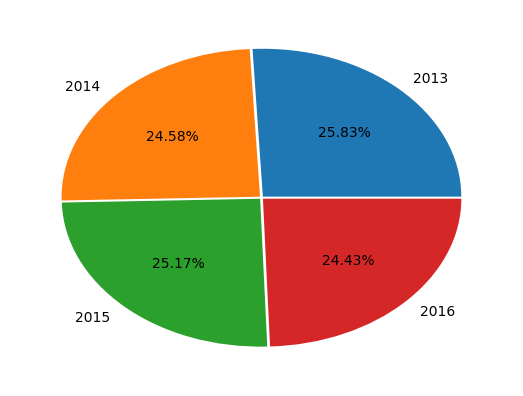

In [35]:
labels = ('2013','2014','2015','2016')
explode = (0.01,0.01,0.01,0.01)
performance = [acc13, acc14, acc15, acc16]
plt.pie(performance, labels = labels, autopct = '%.2f%%', center = (0,0), explode = explode )
plt.show()

A similar rate is obtained as previous.


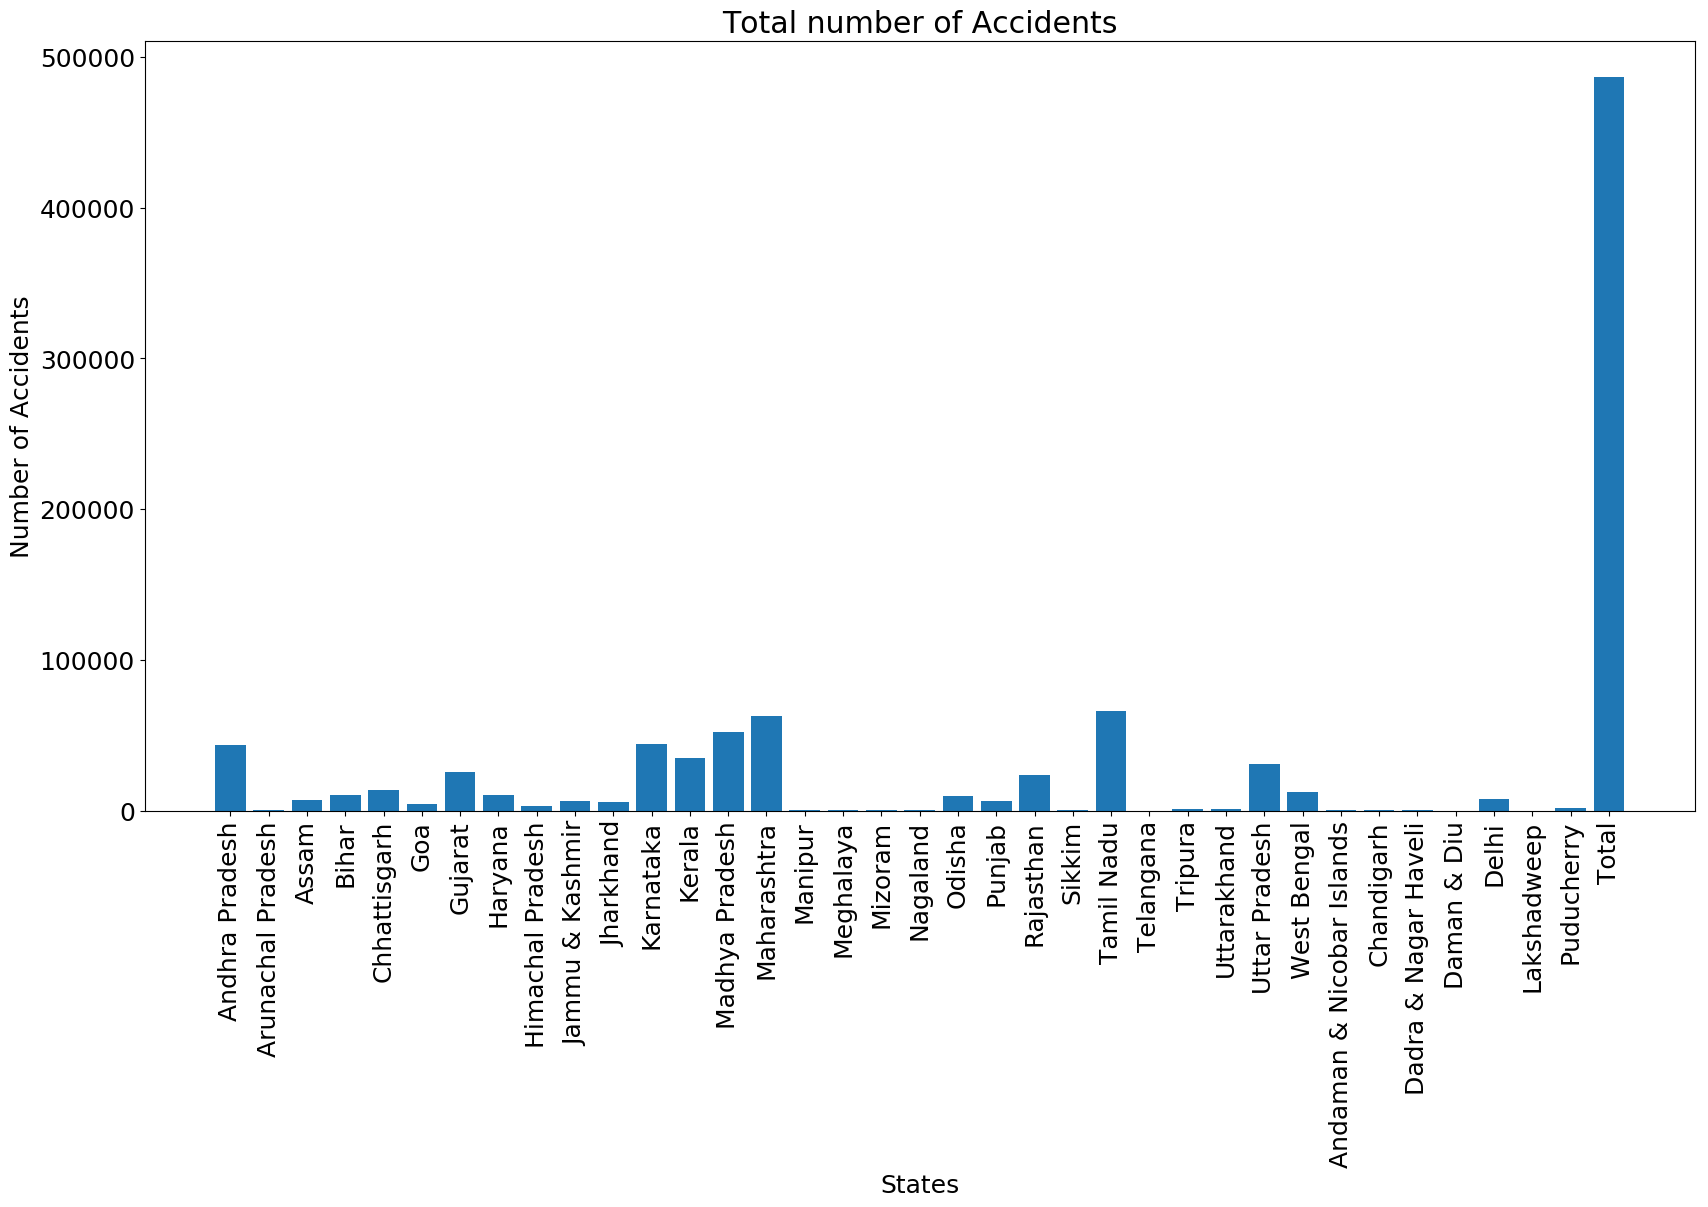

In [36]:
plt.figure(figsize = (20,10))
plt.rcParams.update({'font.size':18})
y = df['State/UT-Wise Total Number of Road Accidents during - 2013']
yd = df['States/UTs']
p =df['States/UTs'].nunique()
d = np.linspace(1,p,p)   # refer notes
plt.bar(d, y, align = 'center')
plt.xticks(d, yd, rotation = 90)
plt.xlabel('States')
plt.ylabel('Number of Accidents')
plt.title('Total number of Accidents')
plt.show()

**Maharashtra** and **Tamil Nadu** have the highest number of accidents. Further investigation needs to be done to understand the case.
**Arunachal, Manipur, Meghalaya, Mizoram, Nagaland, Tripura** have the least number of accidents. They surprisingly all belong to the **north-eastern area.**


#### linspace()
y = linspace(x1,x2,n) generates n points. The spacing between the points is (x2-x1)/(n-1).

linspace is similar to the colon operator, “:”, but gives direct control over the number of points and always includes the endpoints. “lin” in the name “linspace” refers to generating linearly spaced values as opposed to the sibling function logspace, which generates logarithmically spaced values.

In [37]:
min13 = np.min(df['Total Number of Accidents Per Lakh Population - 2013'])
max13 = np.max(df['Total Number of Accidents Per Lakh Population - 2013'])

In [38]:
min14 = np.min(df['Total Number of Accidents Per Lakh Population - 2014'])
max14 = np.max(df['Total Number of Accidents Per Lakh Population - 2014'])

In [39]:
min15 = np.min(df['Total Number of Accidents Per Lakh Population - 2015'])
max15 = np.max(df['Total Number of Accidents Per Lakh Population - 2015'])

In [40]:
min16 = np.min(df['Total Number of Accidents Per Lakh Population - 2016'])
max16 = np.max(df['Total Number of Accidents Per Lakh Population - 2016'])

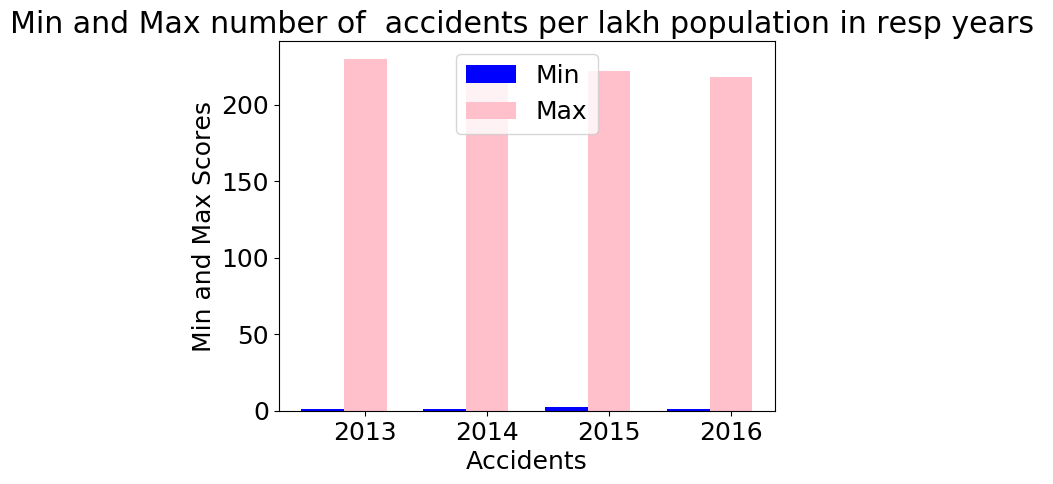

In [41]:
n = 4 
minx = (min13, min14, min15, min16)
maxx = (max13, max14, max15, max16)
index = np.arange(n)
bar_width = 0.35

r1 = plt.bar(index, minx, bar_width, align = 'center', color = 'b', label = 'Min')

r2 = plt.bar(index + bar_width, maxx, bar_width, align = 'center', color ='pink', label = 'Max')

plt.xlabel("Accidents")
plt.ylabel("Min and Max Scores")
plt.title("Min and Max number of  accidents per lakh population in resp years ")
plt.xticks(index + bar_width,('2013','2014','2015','2016'))
plt.legend(loc = 'upper center')
plt.show()

***
<a id='df1'></a>
[Go to top](#top)
## DF1 : 
This dataset shows the number of **offenders** and **victims** who died according to gender as well the as the total deaths.

In [42]:
df1.head(2)

,States/UTs,Year,CrimeHead,Offenders (Driver/Pedestrian) Died_Male,Offenders (Driver/Pedestrian) Died_Female,Offenders (Driver/Pedestrian) Died_Transgender,Offenders (Driver/Pedestrian) Died_Total,Victims Died_Male,Victims Died_Female,Victims Died_Transgender,Victims Died_Total
0,Andhra Pradesh,2014,Truck/Lorry (Total),445,30,0,475,871,135,0,1006
1,Andhra Pradesh,2014,Truck/Lorry - Normal Goods Carriers,357,25,0,382,577,101,0,678


In [43]:
df1.dtypes

States/UTs                                        object
Year                                               int64
CrimeHead                                         object
Offenders (Driver/Pedestrian) Died_Male            int64
Offenders (Driver/Pedestrian) Died_Female          int64
Offenders (Driver/Pedestrian) Died_Transgender     int64
Offenders (Driver/Pedestrian) Died_Total           int64
Victims Died_Male                                  int64
Victims Died_Female                                int64
Victims Died_Transgender                           int64
Victims Died_Total                                 int64
dtype: object

In [44]:
meanOffMale = (np.mean(df1['Offenders (Driver/Pedestrian) Died_Male']))

In [45]:
meanOffFemale = (np.mean(df1['Offenders (Driver/Pedestrian) Died_Female']))

In [46]:
meanOffTrans = (np.mean(df1['Offenders (Driver/Pedestrian) Died_Transgender']))
meanOffTrans, meanOffMale, meanOffFemale

(0.0, 251.59251559251558, 21.717255717255718)

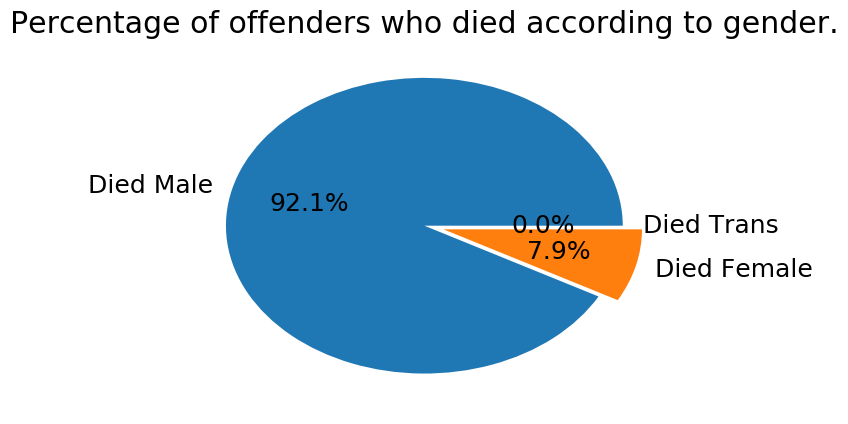

In [47]:
sizes = [meanOffMale, meanOffFemale, meanOffTrans]
labels = ['Died Male','Died Female', 'Died Trans']
explode = (0, 0.1, 0)
plt.pie(sizes, labels = labels, explode = explode, autopct = '%.1f%%')
plt.title("Percentage of offenders who died according to gender.")
plt.show()

### Victims who died according to gender.

In [48]:
meanVictMale = (np.mean(df1['Victims Died_Male']))

In [49]:
meanVictFemale = (np.mean(df1['Victims Died_Female']))

In [50]:
meanVictTrans = (np.mean(df1['Victims Died_Transgender']))
meanVictMale, meanVictFemale, meanVictTrans

(705.8731808731809, 138.59667359667358, 0.13513513513513514)

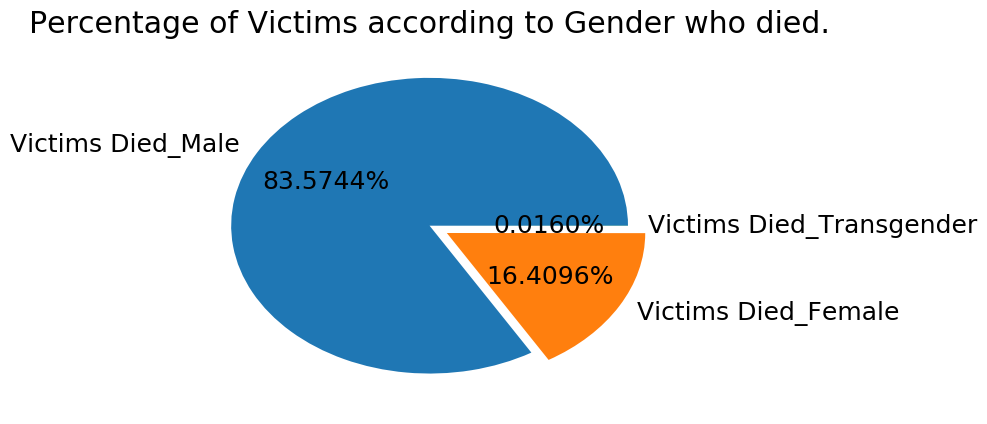

In [51]:
sizes = [meanVictMale, meanVictFemale, meanVictTrans]
labels = 'Victims Died_Male', 'Victims Died_Female', 'Victims Died_Transgender'
explode =(0, 0.1, 0)

plt.pie(sizes, labels = labels, explode = explode, autopct = '%.4f%%')
plt.title("Percentage of Victims according to Gender who died.")
plt.show()

In [52]:
meanOffTotal = (np.mean(df1['Offenders (Driver/Pedestrian) Died_Total']))
meanVictTotal = (np.mean(df1['Victims Died_Total']))
meanOffTotal, meanVictTotal

(273.3097713097713, 844.6049896049896)

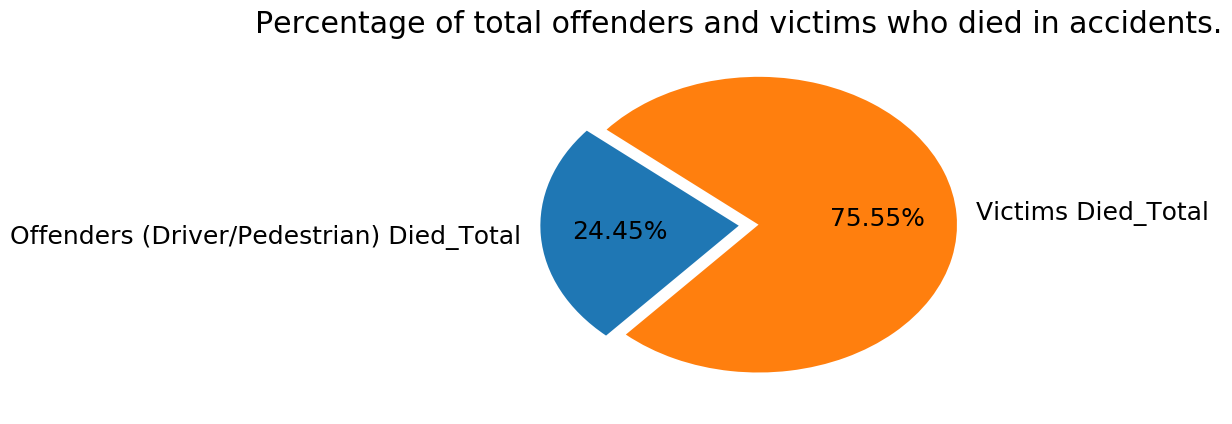

In [53]:
labels = 'Offenders (Driver/Pedestrian) Died_Total','Victims Died_Total'
sizes = [meanOffTotal, meanVictTotal]
explode = (0,0.1)
plt.title("Percentage of total offenders and victims who died in accidents.")
plt.pie(sizes, labels = labels, explode = explode, autopct = '%.2f%%', startangle = 140)
plt.show()

***
<a id='df2'></a>
[Go to top](#top)
## DF2 -
This dataset is about the deaths that occured due to the **ignorance for safety accessories like Helmets, Belts** per gender.

In [54]:
df2.head(2)

,S. No.,State/ UT,Non-wearing of Helmet - Male,Non-wearing of Helmet - Female,Non-wearing of Helmet - Total,Non-wearing of seat belt - Male,Non-wearing of seat belt - Female,Non-wearing of seat belt - Total
0,1,Andhra Pradesh,459,18,477,222,15,237
1,2,Arunachal Pradesh,10,4,14,0,0,0


In [126]:
helmetMale = (np.mean(df2['Non-wearing of Helmet - Male']))
helmetFemale = (np.mean(df2['Non-wearing of Helmet - Female']))
helmetFemale, helmetMale

(82.10810810810811, 465.72972972972974)

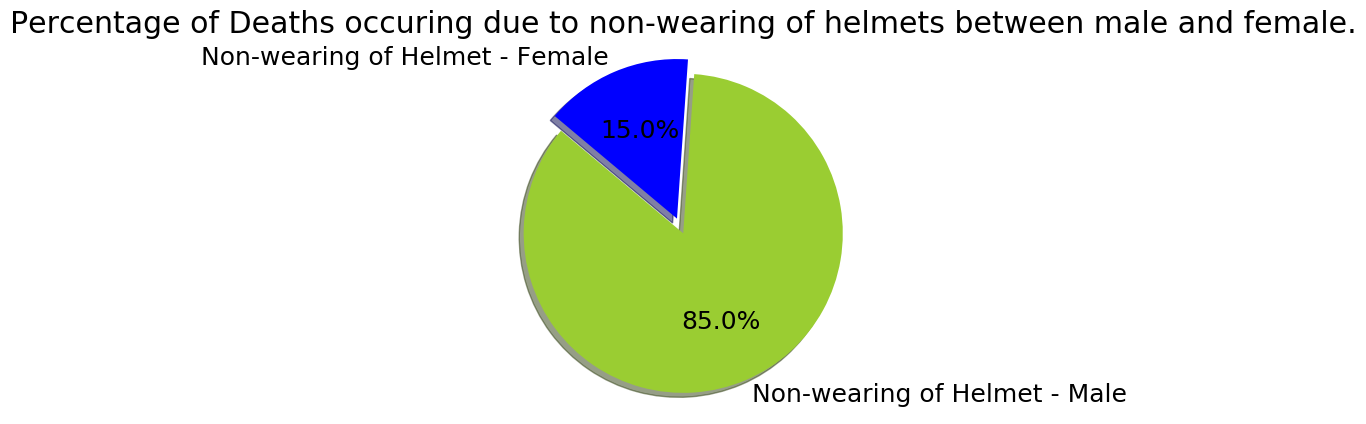

In [56]:
labels = 'Non-wearing of Helmet - Male','Non-wearing of Helmet - Female'
sizes = [helmetMale, helmetFemale]
colors = ['yellowgreen', 'blue']
explode = (0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Percentage of Deaths occuring due to non-wearing of helmets between male and female.")

plt.axis('equal')
plt.show()

In [57]:
max1 = df2['Non-wearing of Helmet - Total'].max()
max2 = df2['Non-wearing of seat belt - Total'].max()
max1, max2

(10135, 5638)

***
<a id = 'df4'></a>
[Go to top](#top)
## DF4  
This data set contains number of **accidents/deaths/injuries occuring as per number of lanes.**

In [58]:
df4 = pd.read_csv('A:\Data Analysis Jupyter\Road-Accidents-Of-India\Databases\\laneAccidents.csv')
df4.head(2)

,S.No,State/UT,Single Lane - Accident - 2014,Single Lane - Accident - 2014 per 1L people,Single Lane - Killed - 2014,Single Lane - Killed - 2014 per 1L people,Single Lane - Injured - 2014,Single Lane - Injured - 2014 per 1L people,Two Lanes - Accident - 2014,Two Lanes - Accident - 2014 per 1L people,...,3 Lanes or more w.o Median - Killed - 2014 per 1L people,3 Lanes or more w.o Median - Injured - 2014,3 Lanes or more w.o Median - Injured - 2014 per 1L people,4 Lanes with Median - Accident - 2014,4 Lanes with Median - Accident - 2014 per 1L people,4 Lanes with Median - Killed - 2014,4 Lanes with Median - Killed - 2014 per 1L people,4 Lanes with Median - Injured - 2014,4 Lanes with Median - Injured - 2014 per 1L people,Population
0,1,Andhra Pradesh,8634.0,16.473750,2958.0,5.643891,13541.0,25.836350,10327.0,19.704009,...,0.755572,1199.0,2.287703,4291.0,8.187267,1560.0,2.976494,5069.0,9.671698,52410653
1,2,Arunachal Pradesh,90.0,6.504173,60.0,4.336115,152.0,10.984826,115.0,8.310888,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1383727


In [59]:
df4.dtypes

S.No                                                           object
State/UT                                                       object
Single Lane - Accident - 2014                                 float64
Single Lane - Accident - 2014 per 1L people                   float64
Single Lane - Killed - 2014                                   float64
Single Lane - Killed - 2014 per 1L people                     float64
Single Lane - Injured - 2014                                  float64
Single Lane - Injured - 2014 per 1L people                    float64
Two Lanes - Accident - 2014                                   float64
Two Lanes - Accident - 2014 per 1L people                     float64
Two Lanes - Killed - 2014                                     float64
Two Lanes - Killed - 2014 per 1L people                       float64
Two Lanes - Injured - 2014                                    float64
Two Lanes - Injured - 2014 per 1L people                      float64
3 Lanes or more w.o 

In [60]:
df4.dropna(axis = 0, how ='any', inplace = True)

*Number of **ACCIDENTS** for 1,2,3,4 lanes per 1L population.*

In [127]:
singleLaneAcc = df4['Single Lane - Accident - 2014 per 1L people']
twoLaneAcc = df4['Two Lanes - Accident - 2014 per 1L people']
threeLaneAcc = df4['3 Lanes or more w.o Median - Accident - 2014 per 1L people']
fourLaneAcc = df4['4 Lanes with Median - Accident - 2014 per 1L people']

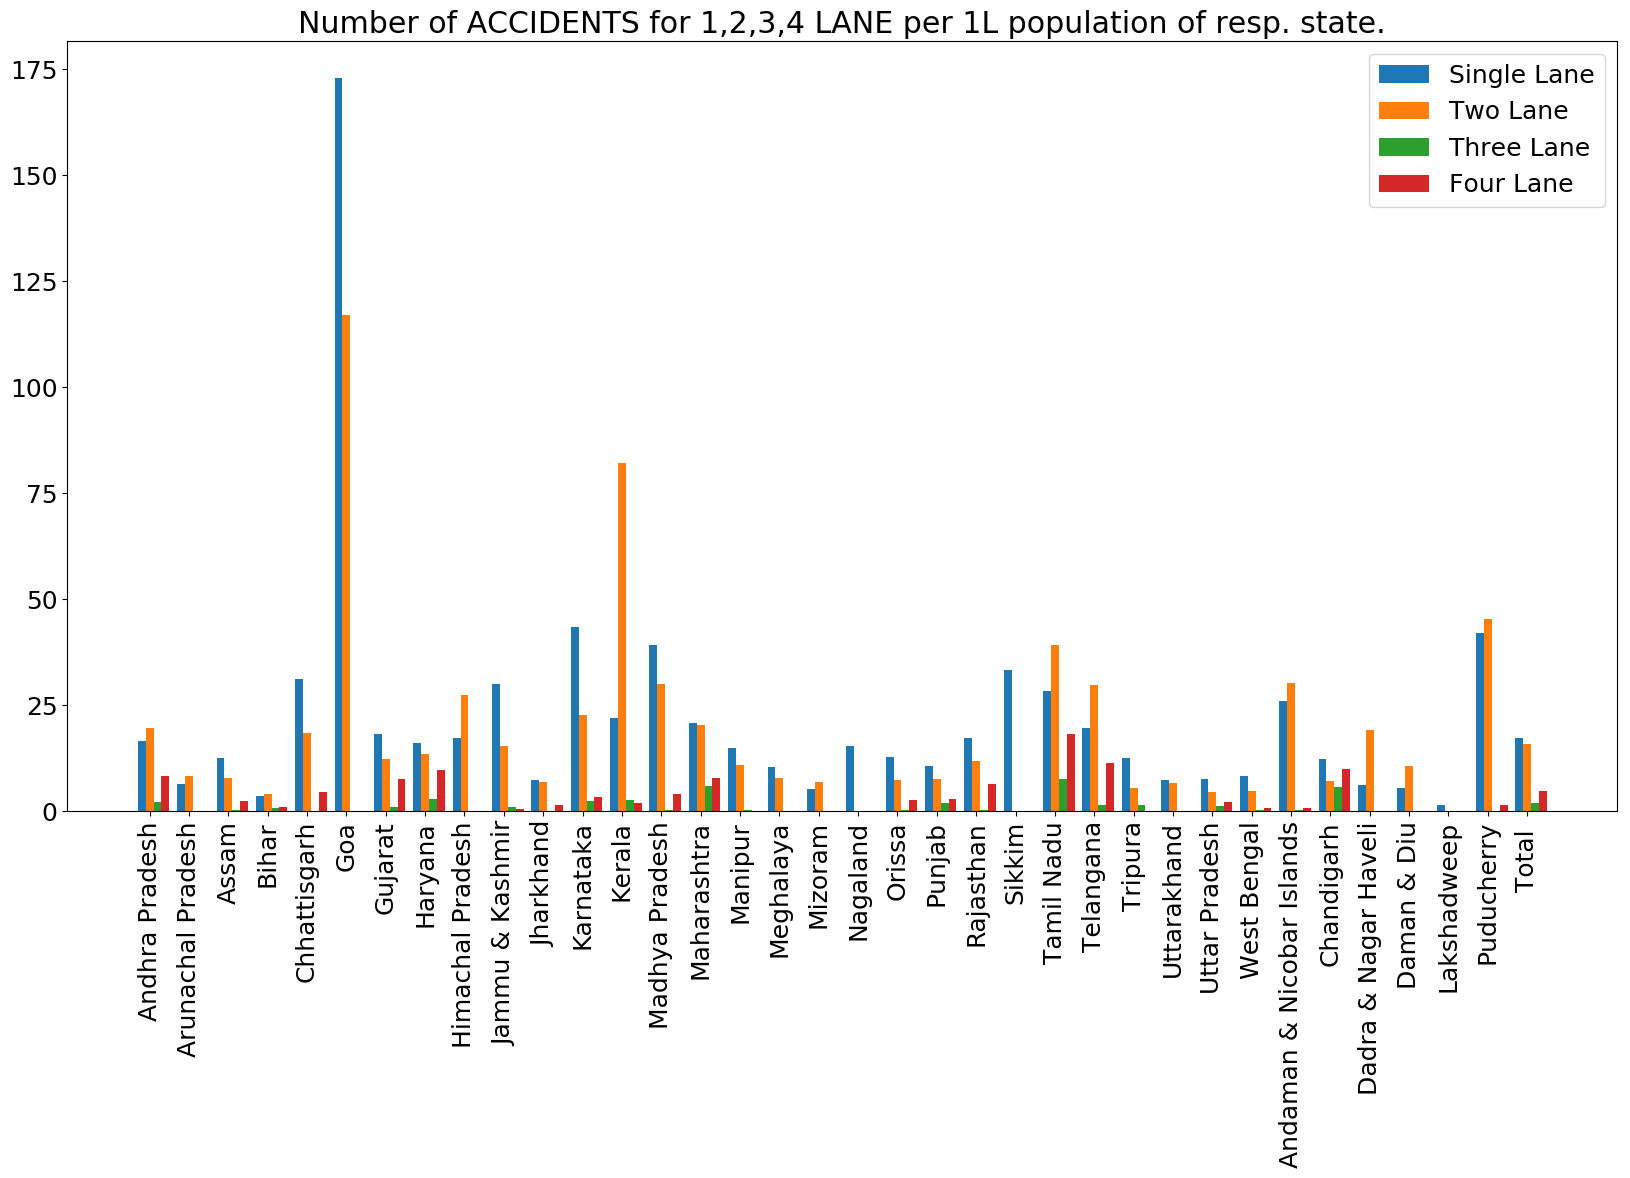

In [128]:
plt.figure(figsize = (20,10))
plt.rcParams.update({'font.size':18})
UT = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])

plt.bar(UT-0.2, singleLaneAcc, label='Single Lane', width = 0.2,
        align = 'center')
plt.bar(UT, twoLaneAcc, label = 'Two Lane', width = 0.2,
        align = 'center')
plt.bar(UT+0.2, threeLaneAcc, label = 'Three Lane', width = 0.2,
        align = 'center')
plt.bar(UT+0.4, fourLaneAcc, label = 'Four Lane', width =0.2,
        align = 'center')

plt.xticks(UT, df4['State/UT'], rotation = 'vertical' )
plt.legend(loc = 'best')
plt.title("Number of ACCIDENTS for 1,2,3,4 LANE per 1L population of resp. state.")
plt.show()

*Number of people **INJURED** for 1,2,3,4 number of lanes per 1L population.*


In [63]:
singleInjured = df4['Single Lane - Injured - 2014 per 1L people']
twoInjured = df4['Two Lanes - Injured - 2014 per 1L people']
threeInjured = df4['3 Lanes or more w.o Median - Injured - 2014 per 1L people']
fourInjured = df4['4 Lanes with Median - Injured - 2014 per 1L people']

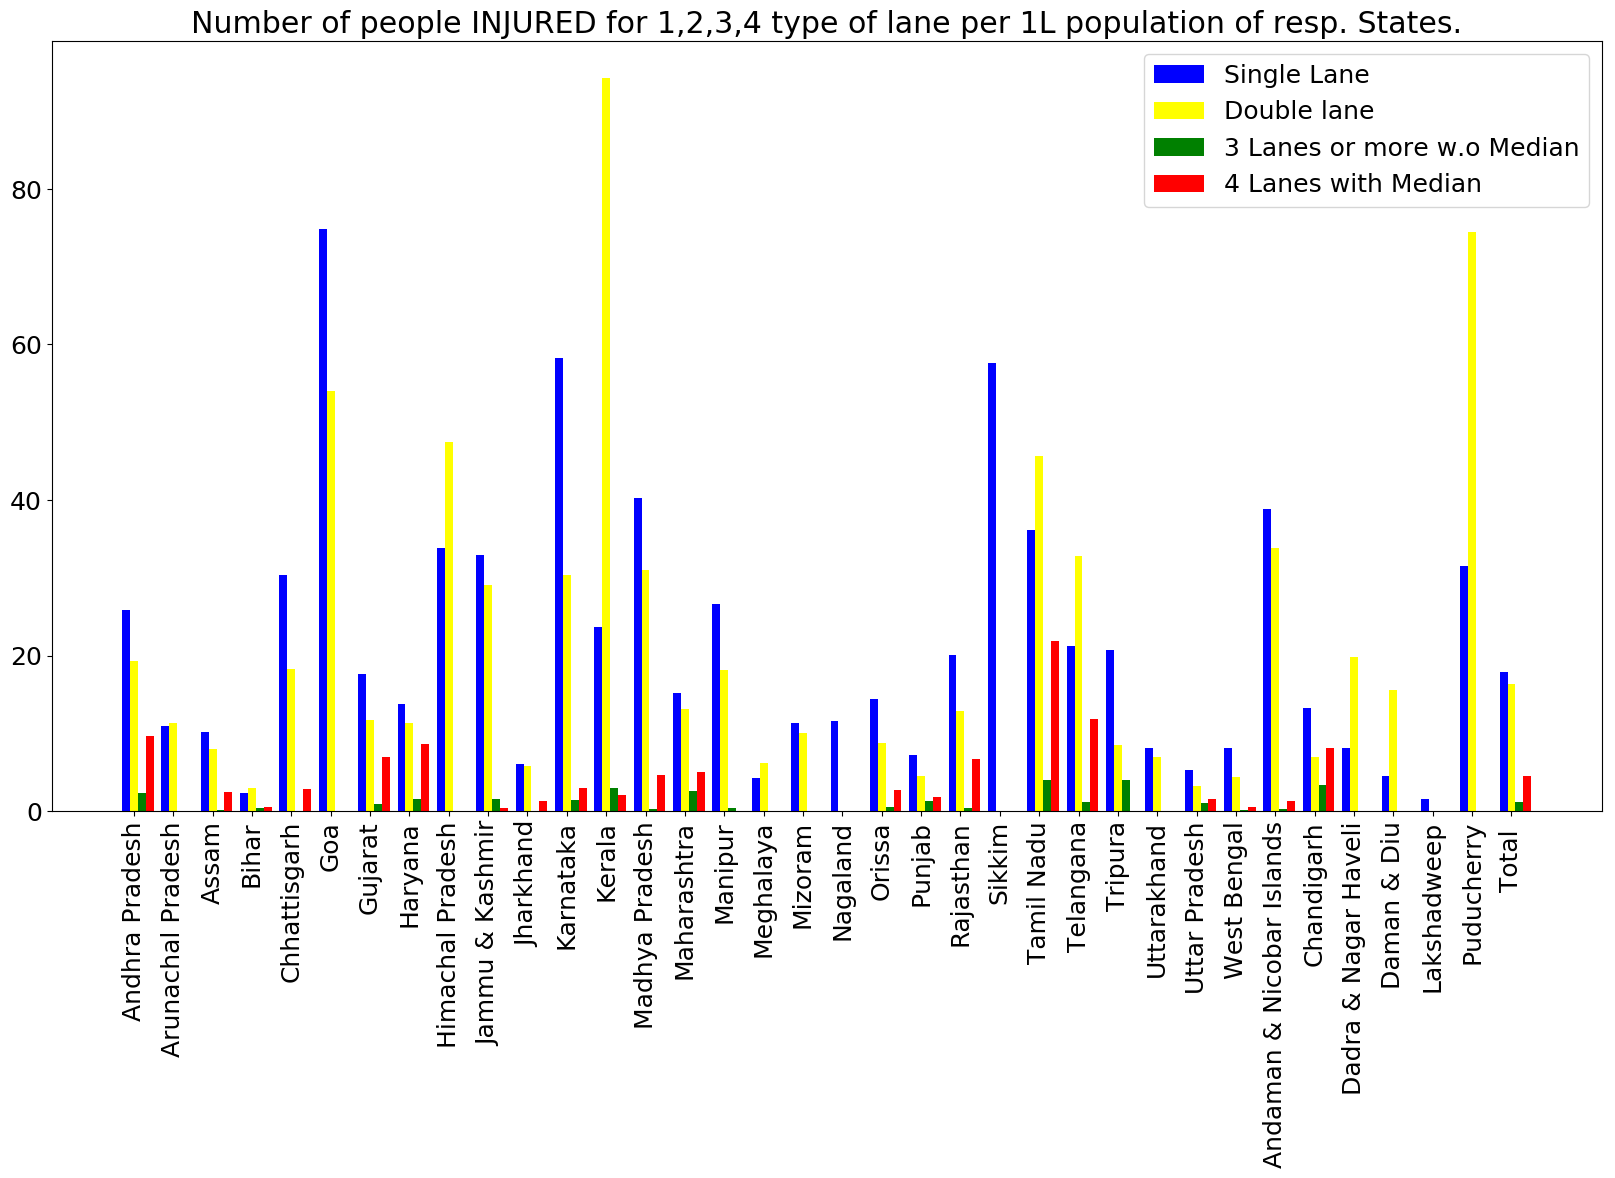

In [97]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2, singleInjured, width=0.2, color='b', 
        align='center',label='Single Lane')
plt.bar(UT, twoInjured, width=0.2, color='yellow', 
        align='center',label='Double lane')
plt.bar(UT+0.2, threeInjured, width=0.2, color='g',
        align='center',label='3 Lanes or more w.o Median')
plt.bar(UT+0.4, fourInjured, width=0.2, color='red', 
        align='center',label='4 Lanes with Median')

plt.xticks(UT, df4['State/UT'], rotation='vertical')
plt.title("Number of people INJURED for 1,2,3,4 type of lane per 1L population of resp. States.")
plt.legend(loc = "best")
plt.show()

*Number of people **KILLED** for 1,2,3,4 Lanes per 1L  population.*

In [65]:
singleLaneKilled = df4['Single Lane - Killed - 2014 per 1L people']
twoLaneKilled = df4['Two Lanes - Killed - 2014 per 1L people']
threeLaneKilled = df4['3 Lanes or more w.o Median - Killed - 2014 per 1L people']
fourLaneKilled = df4['4 Lanes with Median - Killed - 2014 per 1L people']


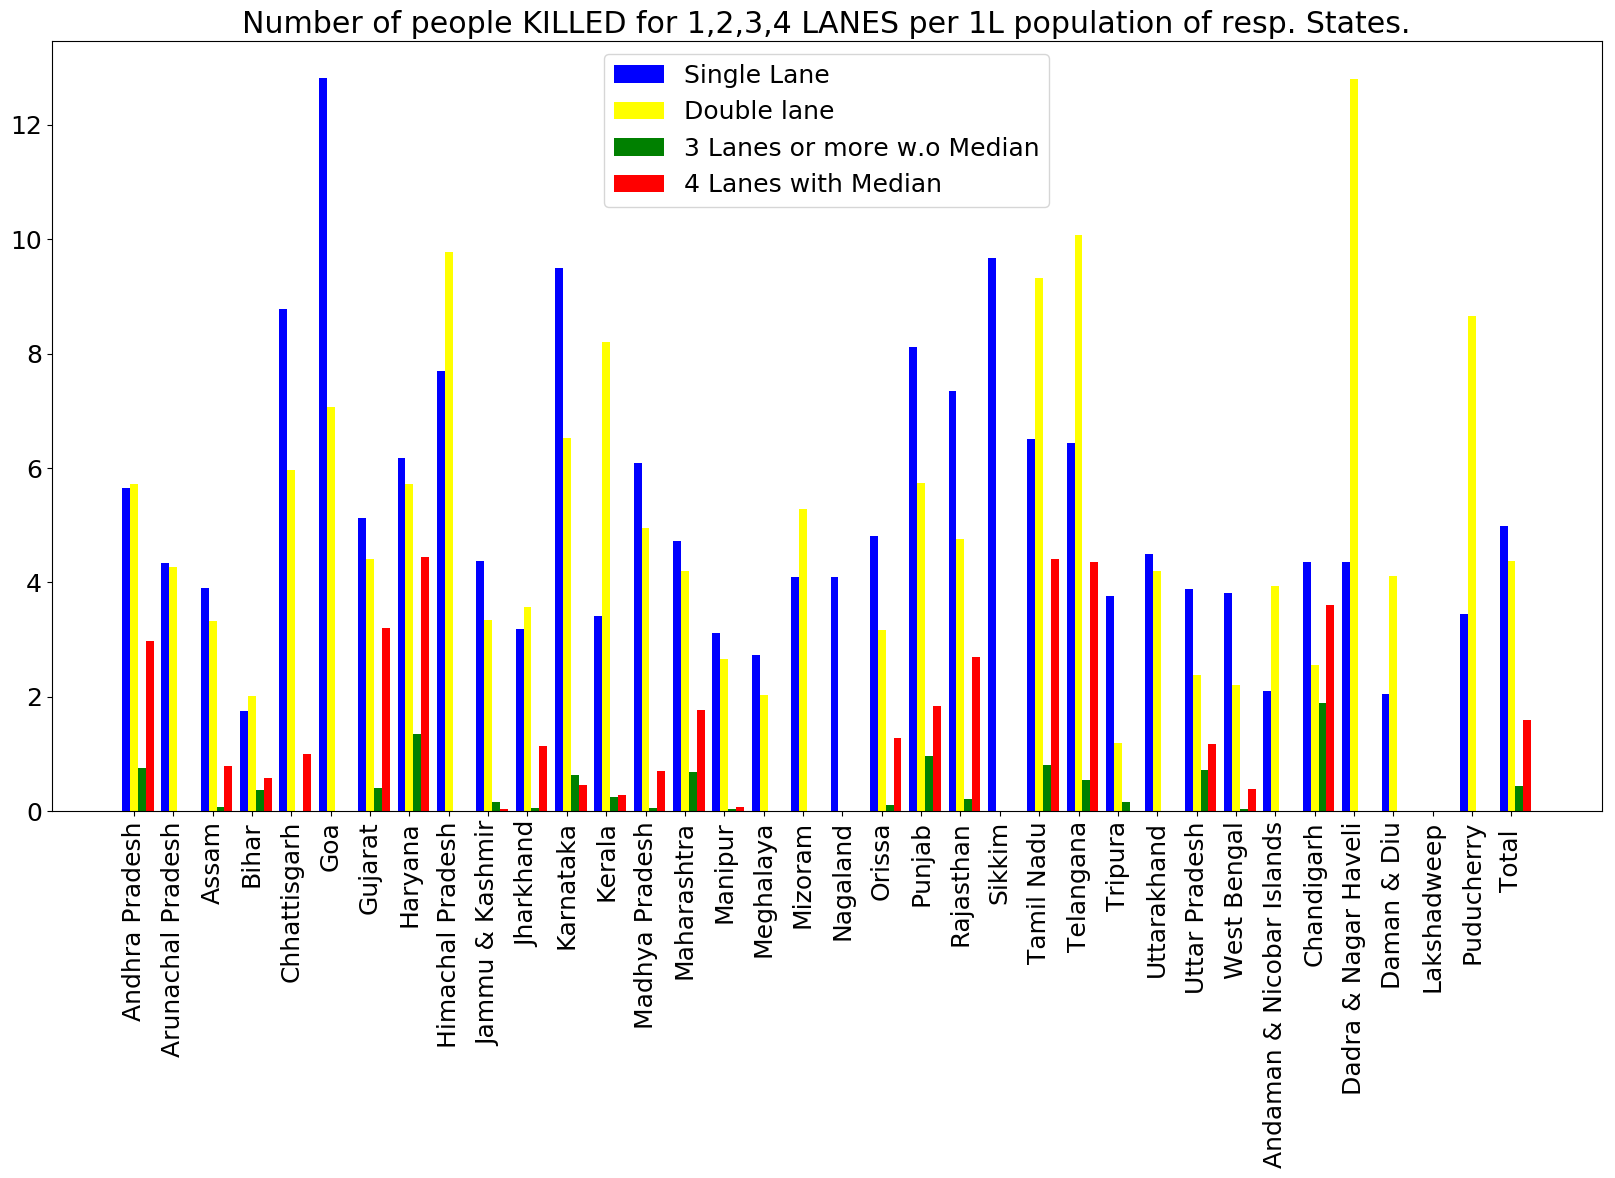

In [96]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2, singleLaneKilled, width=0.2, color='b', 
        align='center',label='Single Lane')
plt.bar(UT, twoLaneKilled, width=0.2, color='yellow', 
        align='center',label='Double lane')
plt.bar(UT+0.2, threeLaneKilled, width=0.2, color='g',
        align='center',label='3 Lanes or more w.o Median')
plt.bar(UT+0.4, fourLaneKilled, width=0.2, color='red', 
        align='center',label='4 Lanes with Median')

plt.xticks(UT, df4['State/UT'], rotation='vertical')
plt.title("Number of people KILLED for 1,2,3,4 LANES per 1L population of resp. States.")
plt.legend(loc = "best")
plt.show()

*Number of accidents, people injured, killed on **SINGLE LANE** per 1L population.*

In [67]:
singleLaneTotalInjured = df4['Single Lane - Injured - 2014 per 1L people']
singleLaneTotalKilled = df4['Single Lane - Killed - 2014 per 1L people']
singleLaneTotalAccidents = df4['Single Lane - Accident - 2014 per 1L people']

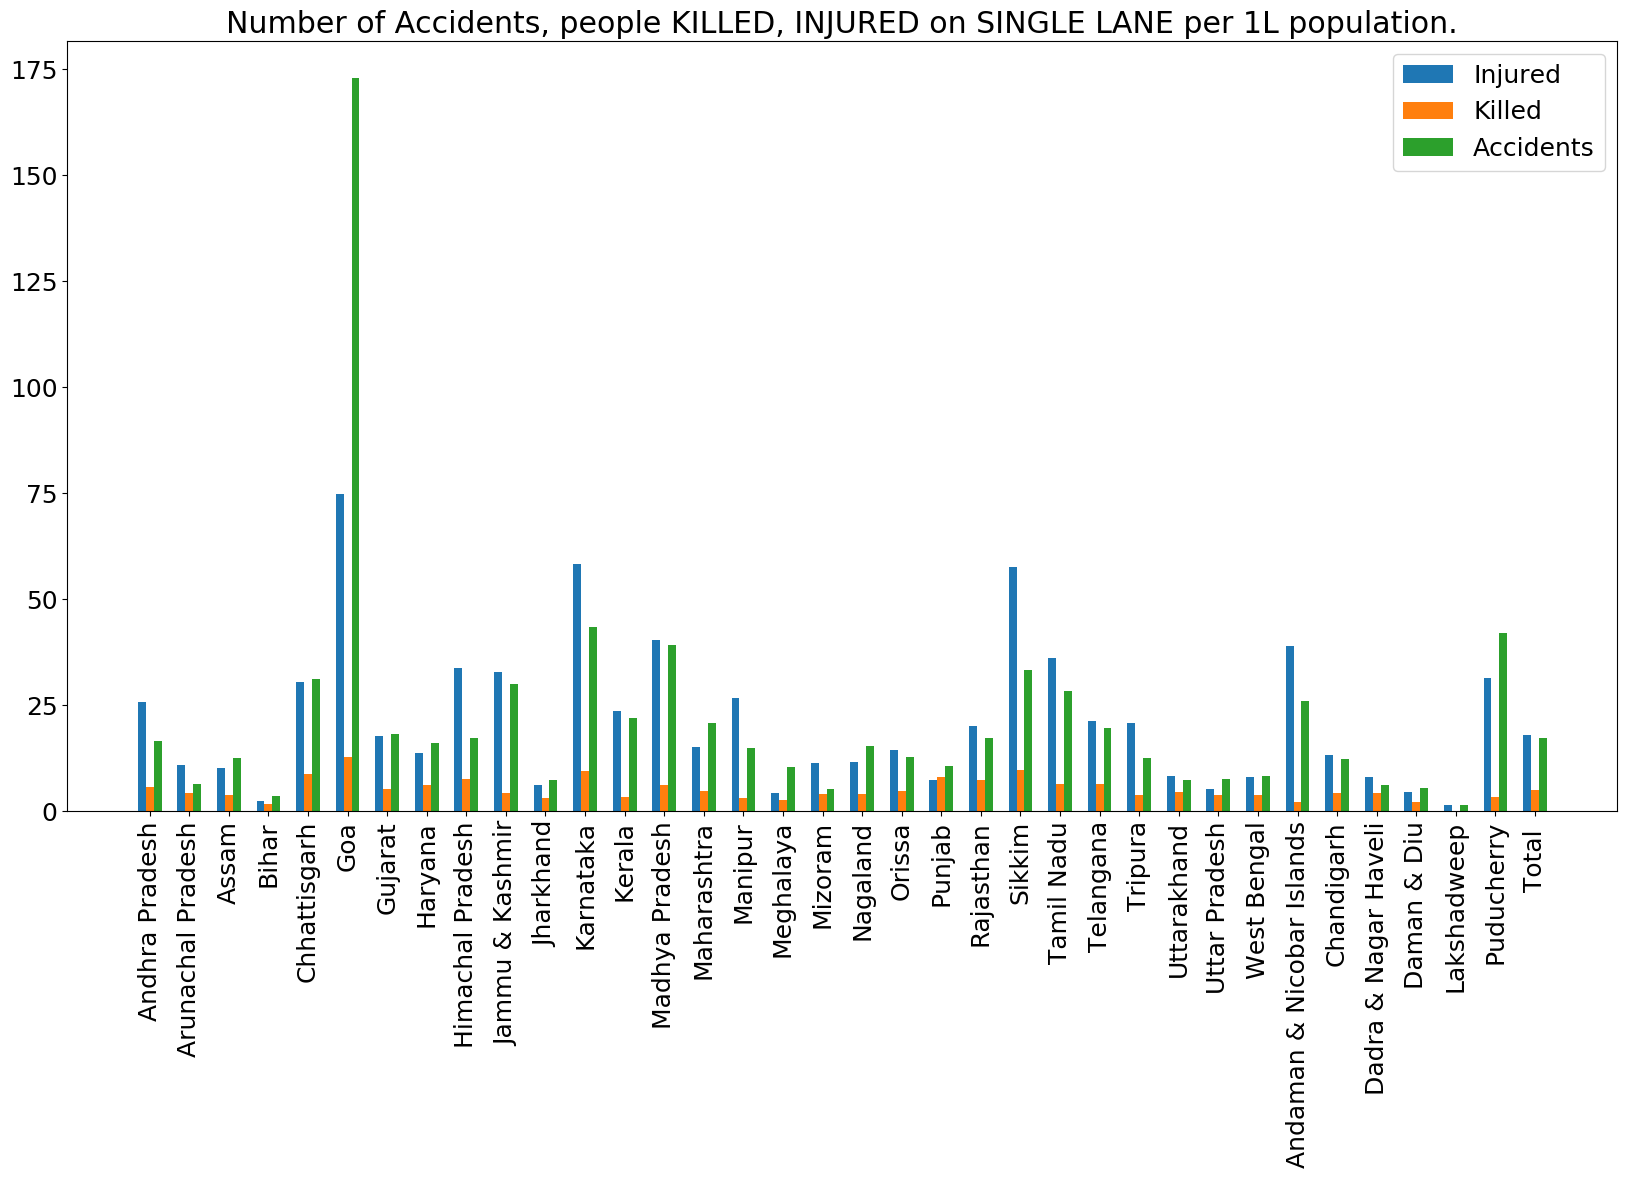

In [129]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2, singleLaneTotalInjured, width=0.2, align='center', label='Injured')
plt.bar(UT, singleLaneTotalKilled, width=0.2, align='center', label='Killed')
plt.bar(UT+0.2, singleLaneTotalAccidents, width=0.2, align='center', label="Accidents")

plt.xticks(UT, df4['State/UT'], rotation='vertical')
plt.title("Number of Accidents, people KILLED, INJURED on SINGLE LANE per 1L population.")
plt.legend(loc = "best")
plt.show()

*Number of accidents, people injured, killed on **DOUBLE LANE** per 1L population.*

In [75]:
twoLaneTotalInjured = df4['Two Lanes - Injured - 2014 per 1L people']
twoLaneTotalKilled = df4['Two Lanes - Killed - 2014 per 1L people']
twoLaneTotalAccidents = df4['Two Lanes - Accident - 2014 per 1L people']

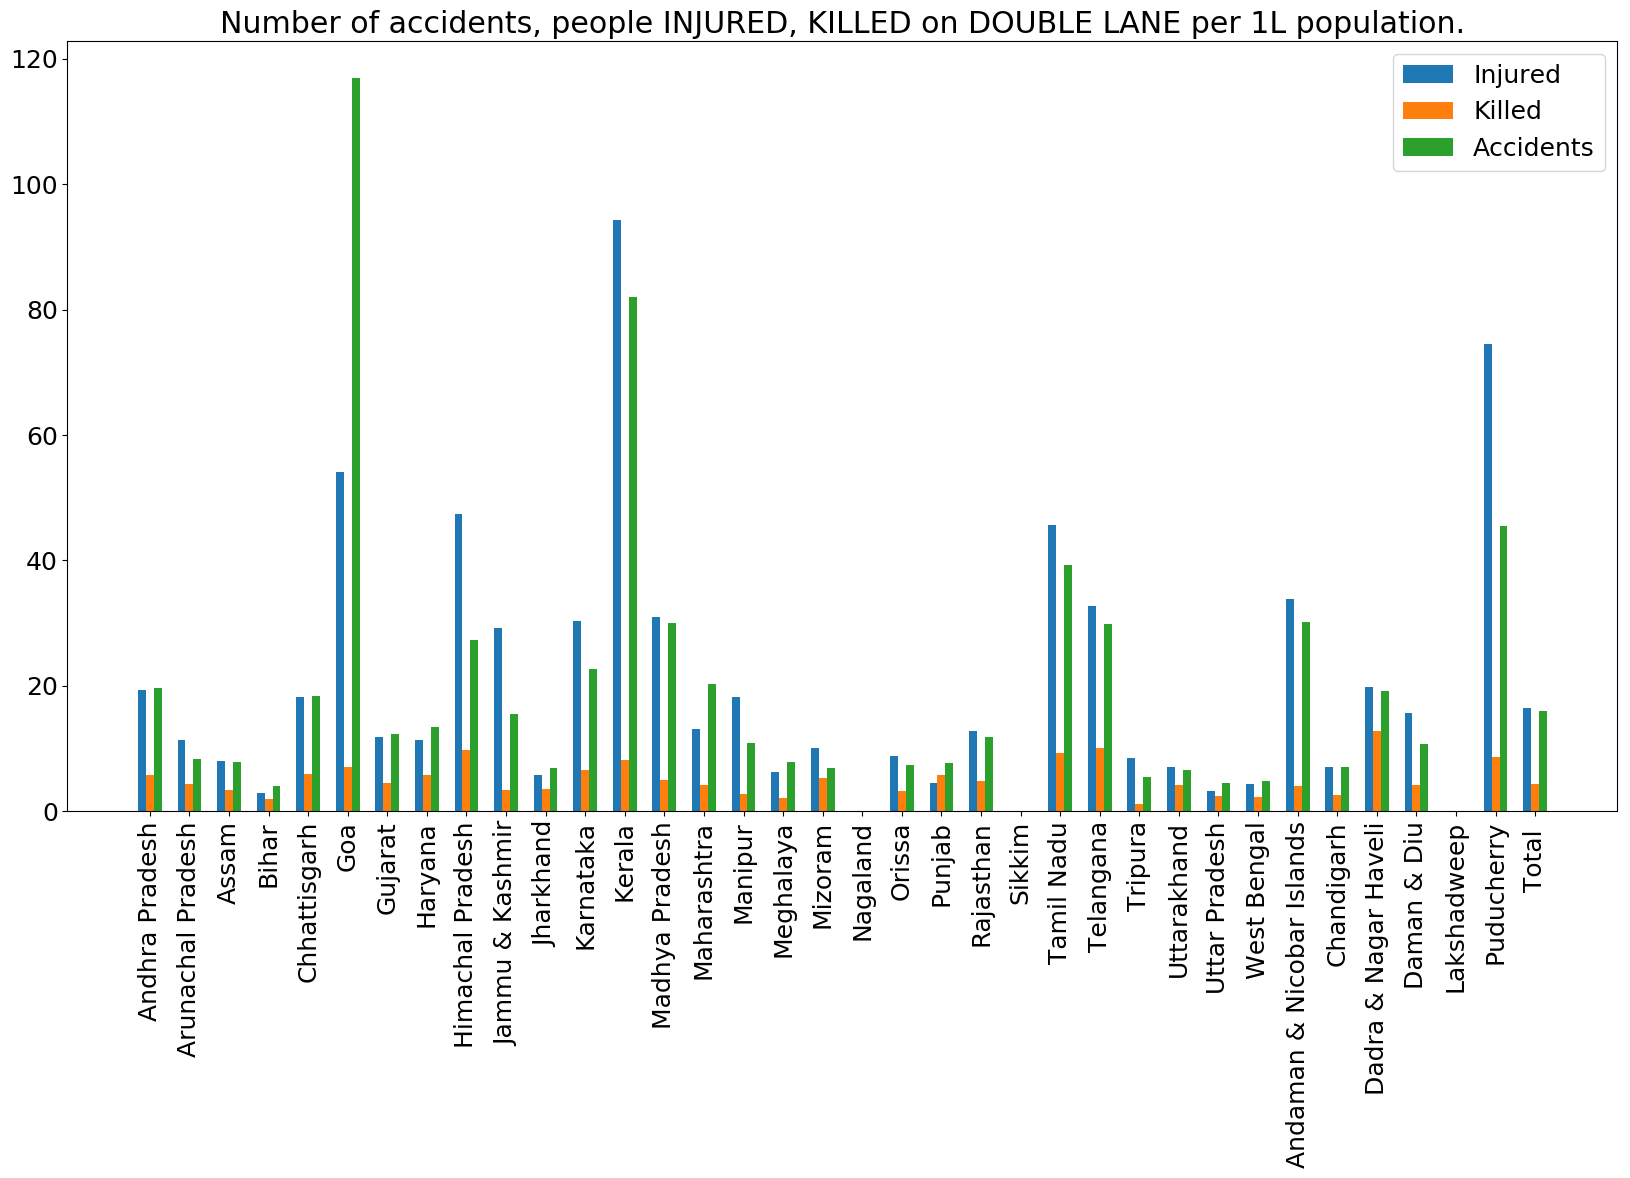

In [130]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2, twoLaneTotalInjured, width=0.2, align='center', label='Injured')
plt.bar(UT, twoLaneTotalKilled, width=0.2, align='center', label='Killed')
plt.bar(UT+0.2, twoLaneTotalAccidents, width=0.2, align='center', label="Accidents")

plt.xticks(UT, df4['State/UT'], rotation='vertical')
plt.title("Number of accidents, people INJURED, KILLED on DOUBLE LANE per 1L population.")
plt.legend(loc = "best")
plt.show()

*Number of accidents, people injured, killed for **THREE LANE** per 1L population.*

In [85]:
threeLaneTotalInjured = df4['3 Lanes or more w.o Median - Injured - 2014 per 1L people']
threeLaneTotalKilled = df4['3 Lanes or more w.o Median - Killed - 2014 per 1L people']
threeLaneTotalAccidents = df4['3 Lanes or more w.o Median - Accident - 2014 per 1L people']

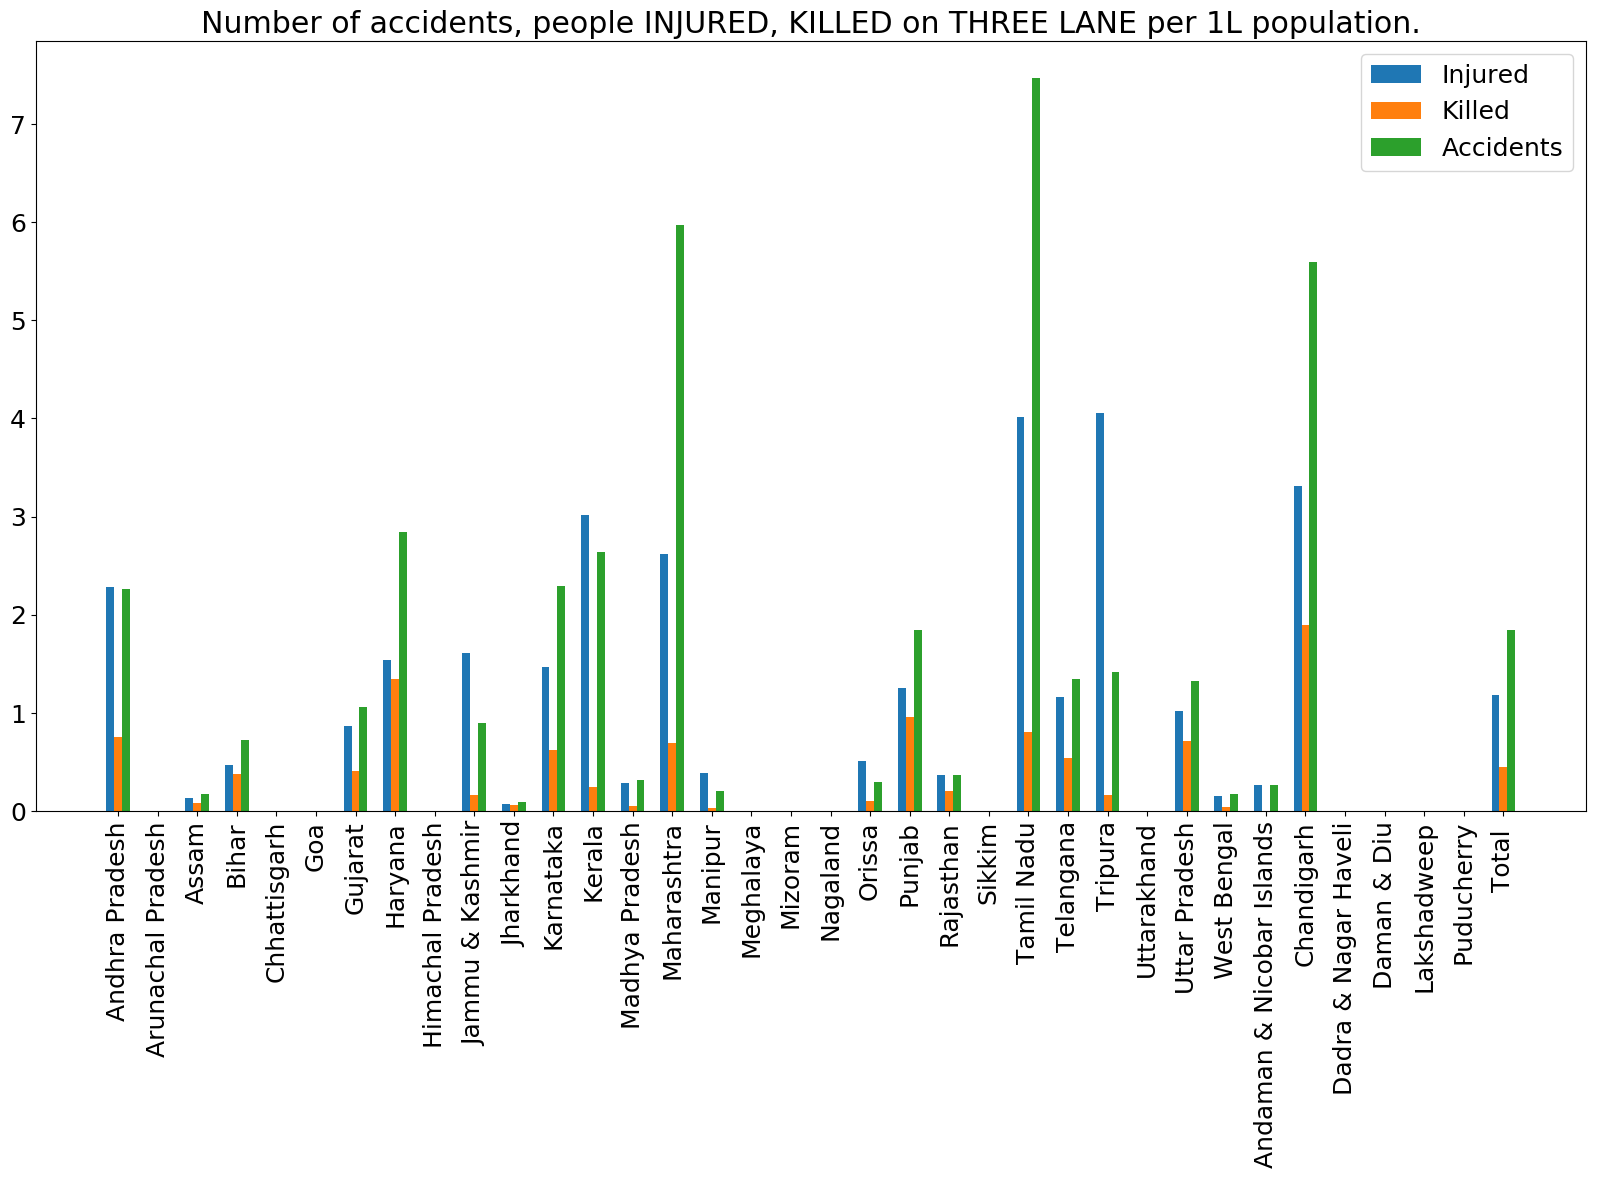

In [131]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2, threeLaneTotalInjured, width=0.2, align='center', label='Injured')
plt.bar(UT, threeLaneTotalKilled, width=0.2, align='center', label='Killed')
plt.bar(UT+0.2, threeLaneTotalAccidents, width=0.2, align='center', label="Accidents")

plt.xticks(UT, df4['State/UT'], rotation='vertical')
plt.title("Number of accidents, people INJURED, KILLED on THREE LANE per 1L population.")
plt.legend(loc = "best")
plt.show()

*Number of accidents, people INJURED, KILLED on **FOUR LANE** per 1L population.*

In [89]:
fourLaneTotalInjured = df4['4 Lanes with Median - Injured - 2014 per 1L people']
fourLaneTotalKilled = df4['4 Lanes with Median - Killed - 2014 per 1L people']
fourLaneTotalAccidents = df4['4 Lanes with Median - Accident - 2014 per 1L people']

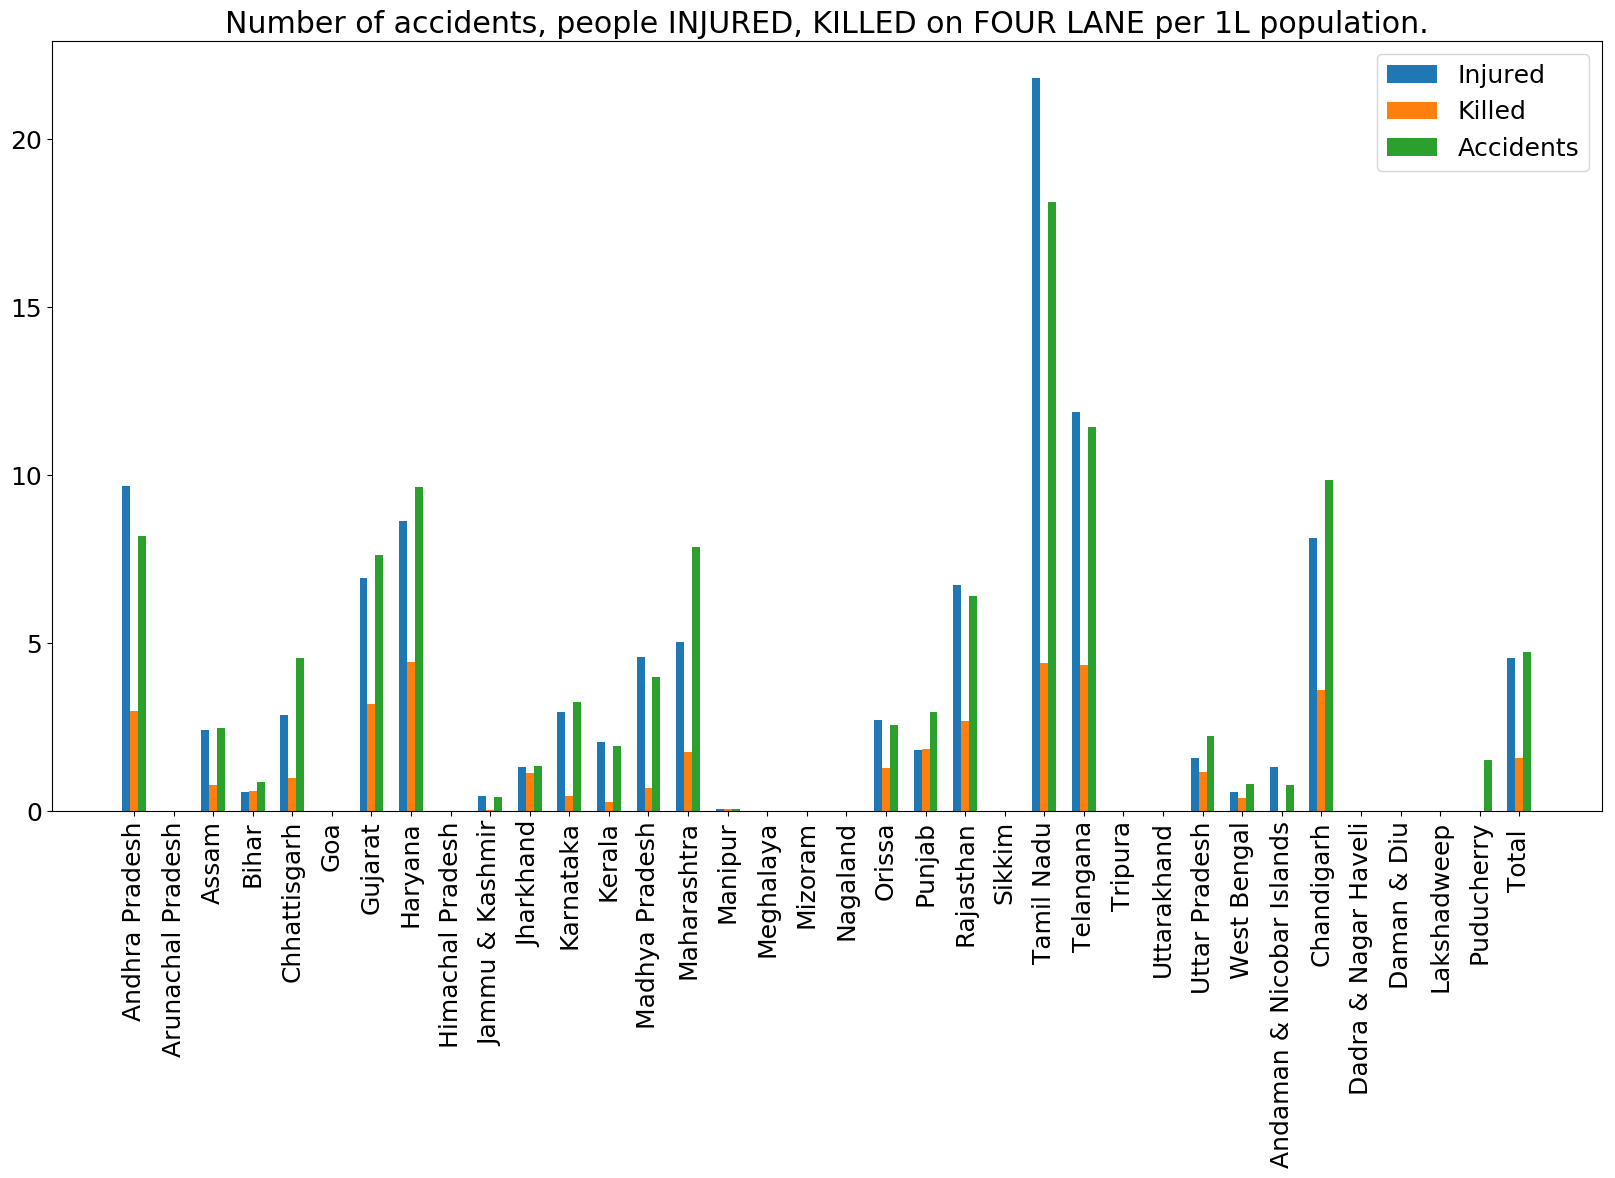

In [132]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2, fourLaneTotalInjured, width=0.2, align='center', label='Injured')
plt.bar(UT, fourLaneTotalKilled, width=0.2, align='center', label='Killed')
plt.bar(UT+0.2, fourLaneTotalAccidents, width=0.2, align='center', label="Accidents")

plt.xticks(UT, df4['State/UT'], rotation='vertical')
plt.title("Number of accidents, people INJURED, KILLED on FOUR LANE per 1L population.")
plt.legend(loc = "best")
plt.show()

*Total number of accidents, people INJURED, KILLED **irrespective of lanes** per 1L population per state*

In [105]:
df4['Sum Total Number of Persons Killed - 2014 per 1L people']=df4['Single Lane - Killed - 2014 per 1L people']+df4['Two Lanes - Killed - 2014 per 1L people']+df4['3 Lanes or more w.o Median - Killed - 2014 per 1L people']+df4['4 Lanes with Median - Killed - 2014 per 1L people']
df4['Sum Total Number of Persons Injured - 2014 per 1L people']=df4['Single Lane - Injured - 2014 per 1L people']+df4['Two Lanes - Injured - 2014 per 1L people']+df4['3 Lanes or more w.o Median - Injured - 2014 per 1L people']+df4['4 Lanes with Median - Injured - 2014 per 1L people']
df4['Sum Total Road Accidents - 2014 per 1L people']=df4['Single Lane - Accident - 2014 per 1L people']+df4['Two Lanes - Accident - 2014 per 1L people']+df4['3 Lanes or more w.o Median - Accident - 2014 per 1L people']+df4['4 Lanes with Median - Accident - 2014 per 1L people']

totalKilled = df4['Sum Total Number of Persons Killed - 2014 per 1L people']
totalInjured = df4['Sum Total Number of Persons Injured - 2014 per 1L people']
totalAccidents = df4['Sum Total Road Accidents - 2014 per 1L people']

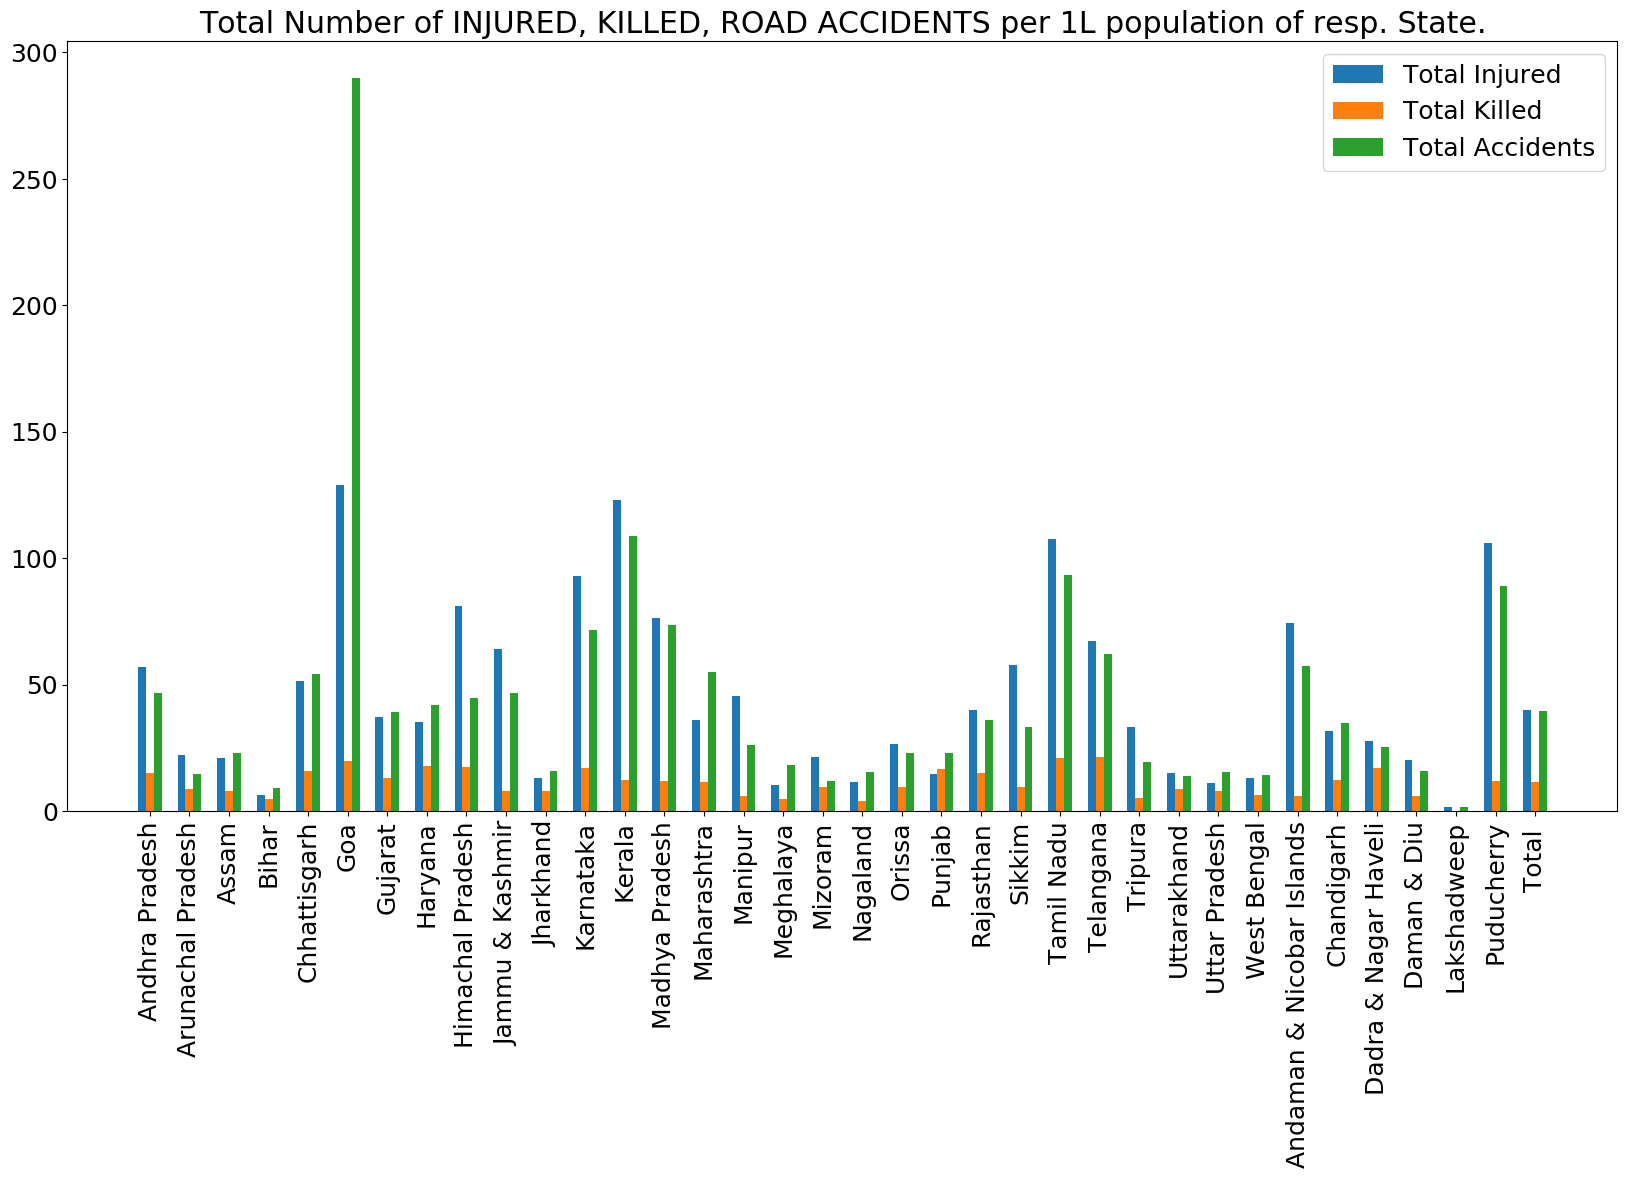

In [107]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2, totalInjured, width=0.2, align='center', label='Total Injured')
plt.bar(UT, totalKilled, width=0.2, align='center', label='Total Killed')
plt.bar(UT+0.2, totalAccidents, width=0.2, align='center', label="Total Accidents")

plt.xticks(UT, df4['State/UT'], rotation='vertical')
plt.title("Total Number of INJURED, KILLED, ROAD ACCIDENTS per 1L population of resp. State.")
plt.legend(loc = "best")
plt.show()